# Predicting Bike Rental Counts in Washington DC

This notebook investigates the dataset 'data/bike_rentals.csv' to predict the number of bike rentals based on the features in the city of Washington DC, USA. The city collects detailed data on the number of bicycles people rent by the hour and day.  
  
The dataset contains 17380 rows, with each row representing the number of bike rentals for a single hour of a single day. Here are the descriptions for the relevant columns:  
  
instant - A unique sequential ID number for each row  
dteday - The date of the rentals  
season - The season in which the rentals occurred  
yr - The year the rentals occurred  
mnth - The month the rentals occurred  
hr - The hour the rentals occurred  
holiday - Whether or not the day was a holiday  
weekday - The day of the week (as a number, 0 to 7)  
workingday - Whether or not the day was a working day  
weathersit - The weather (as a categorical variable)  
temp - The temperature, on a 0-1 scale  
atemp - The adjusted temperature  
hum - The humidity, on a 0-1 scale  
windspeed - The wind speed, on a 0-1  
scale casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)   
registered - The number of registered riders (people who had already signed up)  
cnt - The total number of bike rentals (casual + registered)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Loading the dataset

data =  pd.read_csv('data/bike_rentals.csv')

data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
data.shape

(17379, 17)

### Data Cleaning

In [4]:
# droping the dteday column. It's also posible to segregate the day from dteday and add as new column!
data.drop('dteday', axis = 1, inplace = True)

In [5]:
# Let's make the 'hr' column to hold the data as 1,2,3,4 (kind of category!) depending on hour value. i.e., [0-6 hr = 1, 6-12 hr = 2, 12-18 hr = 3, 18-24 hr = 4]

def assign_label(hour):
    if hour >= 0 and hour < 6:
        return 4
    elif hour >= 6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <= 24:
        return 3

data["time_label"] = data["hr"].apply(assign_label)
data.head(3)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4


In [6]:
# Check for any missing value

data.isna().sum()

instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
time_label    0
dtype: int64

### Visualization

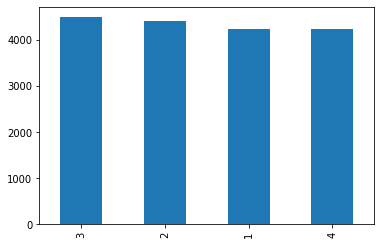

In [7]:
# Bike rentals per season

data['season'].value_counts().plot(kind = 'bar')

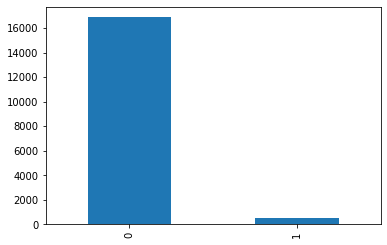

In [8]:
# Bike rentals per holiday
data['holiday'].value_counts().plot.bar()

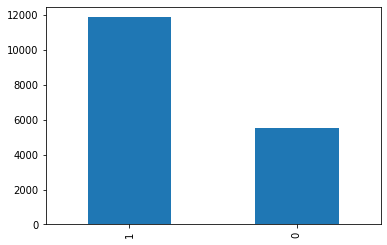

In [9]:
# Bike rentals on a working day
data['workingday'].value_counts().plot.bar()

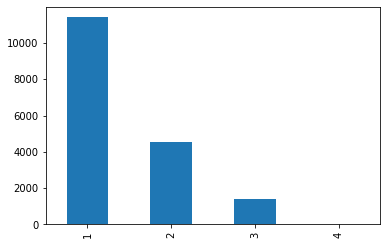

In [10]:
# Bike rentals based on weather

data['weathersit'].value_counts().plot.bar()

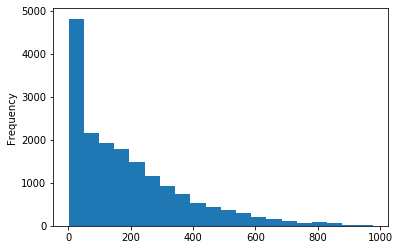

In [11]:
# Transforming variables if any?

# plot the target and check its distribution!

data['cnt'].plot(kind = 'hist', bins = 20)

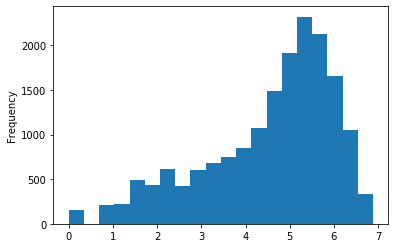

In [12]:
# Target is skewed!. Lets transform it...

np.log(data['cnt']).plot(kind = 'hist', bins = 20)

### Model fitting and Estimation

In [13]:
X = data.drop('cnt', axis = 1) # features
y = np.log(data['cnt'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [14]:
# Let's use Root Mean Square error as the metric to figure out which regression algorithm is good for prediction!

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [15]:
#Linear Regression
lr = LinearRegression()

# Model Fit
lr.fit(X_train, y_train)

# prediction
predict = lr.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(predict, y_test))

lr_rmse

0.651113680951642

In [16]:
# Appling Ridge

ridge = Ridge(alpha = 0.3, max_iter = 100)

# Fitting the model
ridge.fit(X_train, y_train)

# Ridge Regression Model Prediction
ridge_predict = ridge.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(ridge_predict, y_test))

ridge_rmse

0.6511044494066307

In [17]:
# Decision Tree Regressor

dt_reg = DecisionTreeRegressor(min_samples_leaf = 5)

# Fitting the model
dt_reg.fit(X_train, y_train)

# Prediction
dt_predict = dt_reg.predict(X_test)
dt_rmse = np.sqrt(mean_squared_error(dt_predict, y_test))

dt_rmse

0.02816317279020613

Decision Tree Regressor has higher accuracy (lowest error) compared to Linear or Ridge Regression! We could use it as the model for prediction.